**Clustering**, falling under the category of **unsupervised machine learning**, is a one of the problems that machine learning algorithms solve.

**Clustering** is the process of grouping similar data points together. The goal of this unsupervised machine learning technique is to find similarities in the data points and group similar data points together.

Clustering only uses the input data, to determine patterns or similarities in its input data.

<img src='images/c1.png' width='60%' height='60%'/>

### Applications

**1:Market Segmentation**
Imagine you’re a marketing manager, and you have a new product to sell. You’re sure the product would bring a huge profit, as long as it is sold to the right people..

That’s where clustering comes to help...

<img src='images/c2.png' width='80%' height='80%'/>

### 2: Image segmentation

**Classify different objects in an image into different clusters/groups**

<img src='images/image.png' width='40%' height='40%'/>

### Now a good clustering algorithm aims to create clusters whose:

- intra-cluster distance is minimum

- inter-cluster distance is maximum

<img src='images/c3.jpg' width='60%' height='60%'/>

### K-Means: one of the clustering algorithm

- It is used to classify or to group objects based on attributes/features into K number of groups.
  K is positive integer number. 

- k-means performs division of objects into clusters which are “similar” between them and are “dissimilar” to 
  the objects belonging to another cluster.


<img src='images/k_means.png' width='60%' height='60%'/>

A **cluster** is a group of data points that are grouped together due to similarities in their features. 

When using a K-Means algorithm, a cluster is defined by a **centroid**, which is a point at the center of a cluster. 

<img src='images/cen.jpg' width='30%' height='30%'/>

### How K-Means clustering Works..?

- Step 1: Choose the number of k clusters

- Step 2: Select at random k points,the centroids

- Step 3: Assign each data points to closet centroid

- Step 4: Compute and place the new centroid of each cluster

- Step 5: Reassign each data point to the new closet centroid

If any Reassignment took place, go to step 4

<img src='images/k1.PNG' width='40%' height='40%'/>

<img src='images/k2.PNG' width='40%' height='40%'/>

<img src='images/k3.PNG' width='40%' height='40%'/>

<img src='images/k4.PNG' width='40%' height='40%'/>

<img src='images/k5.PNG' width='40%' height='40%'/>

### With-In Cluster Sum of Squared Error(WCSS)

<img src='images/means.png' width='40%' height='40%'/>

### Code Sample

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X , y = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=.5,
                   shuffle=True,random_state=0)

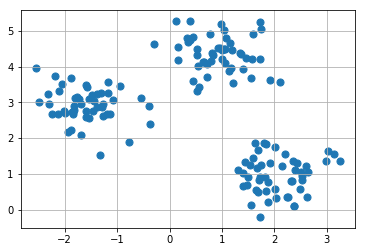

In [4]:
plt.scatter(X[:,0],X[:,1],marker='o',s=50)
plt.grid()
plt.show()

**Grouping the samples using K-Means algorithm**

In [6]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans(n_clusters=3,n_init=10,max_iter=300)

we set **n_init=10** to run the k-means clustering algorithm 10 times independently with different
random centroids to choose the final model as the one with the lowest SSE


**max_iter** parameter specify maximum number of iterations for each single run..

In [12]:
km.fit(X)
pred=km.predict(X)

In [13]:
pred

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

In [14]:
#km.labels_

### WCSS Error

In [15]:
km.inertia_

72.47601670996698

### Centroid

In [16]:
km.cluster_centers_

array([[ 0.9329651 ,  4.35420712],
       [ 2.06521743,  0.96137409],
       [-1.5947298 ,  2.92236966]])

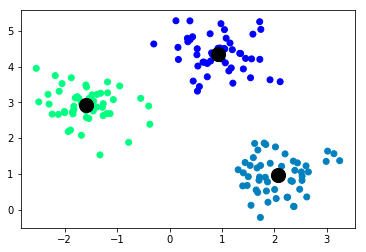

In [17]:
plt.scatter(X[:,0],X[:,1],c=pred,cmap='winter')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)
plt.show()

### Using the elbow method to find the optimal number of clusters

In [18]:
WSSE = []

for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=0)
    km.fit(X)
    WSSE.append(km.inertia_)

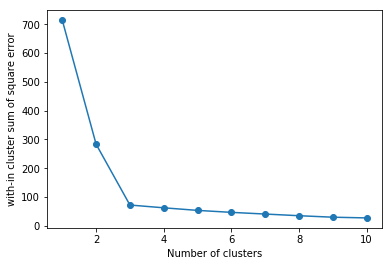

In [19]:
plt.plot(range(1,11),WSSE,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('with-in cluster sum of square error')
plt.show()

**the optimum clusters is where the elbow occurs(k=3). This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. **

In [20]:
import pandas as pd
pd.DataFrame(WSSE,index=range(1,11))

,0
1,713.699829
2,283.461018
3,72.476017
4,62.840618
5,53.872027
6,47.037260
7,41.186490
8,35.406070
9,30.246854
10,27.766483


### Clustering on Iris dataset

In [21]:
from sklearn.datasets import load_iris

In [25]:
iris = load_iris()
X = iris.data
#y = iris.target

In [23]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

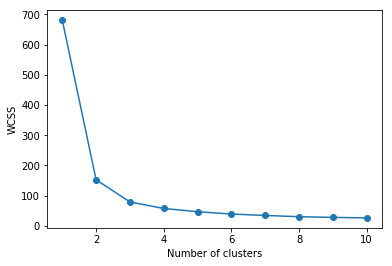

In [24]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()